In [1]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from openpyxl import load_workbook

from scipy import stats as stats
from copy import copy as copy


In [2]:
### import data from excel workbook

wb = load_workbook('../../../Documents/Nanostring/Records/Initial Dataset.xlsx')

print(wb.sheetnames)
ws = wb['Exported dataset']

values = [[y.value for y in x] for x in ws[ws.calculate_dimension()]]
# values

['Exported dataset']


/Users/upton6/opt/anaconda3/envs/kyle_tiff/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
### Convert nested list to a pandas dataFrame and extract expression data with labels

df = pd.DataFrame(values)

rowLabels = df.iloc[23:,3]
# rowLabels = [x.split(' (')[0] for x in rowLabels.values]
rowLabels = dict(zip([x for x in range(23,23+len(rowLabels))],rowLabels))
rowLabels

colLabels = df.iloc[0,4:]
colLabels = [x.replace(' | ','_') for x in colLabels.values]
colLabels = dict(zip([x for x in range(4,4+len(colLabels))],colLabels))
colLabels

data = df.iloc[23:,4:].astype(np.float32)
data.rename(index=rowLabels,columns=colLabels, inplace=True)


data

dataOrig = data.copy()


# Log transform data for QC and analysis steps
dataRaw = np.log2(data)


In [4]:
probeClass = df.iloc[23:,2]      ### Index needs updating here also

probeClass.rename(index=rowLabels, inplace=True)
probeClass.rename(index='ProbeClass', inplace=True)
probeClass

probeClassDict = {
    'Positive': 'A',
    'Negative': 'B',
    'Control': 'C',
    'Endogenous': 'E'
}


In [5]:
## Add column to data with mean values for each probe (row)
mean = dataRaw.mean(axis = 1)
dataRaw = dataRaw.assign(mean=mean.values)

## Add column to data with probe class for each probe
dataRaw = dataRaw.assign(probeClass=[probeClassDict[v] for v in probeClass.values])

### Extract lists of controls and their values
posCTLs = probeClass.index[probeClass== 'Positive'].tolist()
negCTLs = probeClass.index[probeClass== 'Negative'].tolist()
IgCTLs = copy(negCTLs)
IgCTLs.remove('HYB-NEG')
HK = probeClass.index[probeClass== 'Control'].tolist()
endog = probeClass.index[probeClass== 'Endogenous'].tolist()

print('Positive Control count:\t{:d}, {}'.format(len(posCTLs), posCTLs))
print('Nagative Control count:\t{:d}, {}'.format(len(negCTLs), negCTLs))
print('Ig Control count:\t{:d}, {}'.format(len(IgCTLs), IgCTLs))
print('HK Control count:\t{:d}, {}'.format(len(HK), HK))
print('Endogenous probe count:\t{:d}, {}'.format(len(endog), endog))


Positive Control count:	1, ['HYB-POS']
Nagative Control count:	4, ['HYB-NEG', 'Rb IgG', 'Ms IgG2a', 'Ms IgG1']
Ig Control count:	3, ['Rb IgG', 'Ms IgG2a', 'Ms IgG1']
HK Control count:	3, ['S6', 'Histone H3', 'GAPDH']
Endogenous probe count:	28, ['CD8', 'CD4', 'GZMB', 'Fibronectin', 'Beta-2-microglobulin', 'PD-1', 'HLA-DR', 'CD3', 'CD56', 'CD11c', 'CTLA4', 'CD68', 'PanCk', 'SMA', 'CD20', 'PD-L1', 'CD45', 'Ki-67', 'IDO1', 'Tim-3', '4-1BB', 'STING', 'GITR', 'OX40L', 'VISTA', 'B7-H3', 'LAG3', 'ARG1']


In [6]:
dataRaw

,BCLA_34_1.1_001_Immune,BCLA_34_1.1_002_Immune,BCLA_34_1.1_003_Immune,BCLA_34_1.1_101_Immune,BCLA_34_1.1_101_Tumour,BCLA_34_1.1_102_Immune,BCLA_34_1.1_102_Tumour,BCLA_34_1.1_103_Immune,BCLA_34_1.1_103_Tumour,BCLA_34_1.1_104_Immune,...,BCLA_34_1.1_201_Tumour,BCLA_34_1.1_202_Immune,BCLA_34_1.1_203_Epi.Immune,BCLA_34_1.1_203_Tumour,BCLA_34_1.1_204_Immune,BCLA_34_1.1_205_Epi.Immune,BCLA_34_1.1_205_Tumour,BCLA_34_1.1_206_Immune,mean,probeClass
CD8,6.274118,9.882072,7.899079,11.235027,9.478395,9.537515,8.781722,9.677155,9.576798,10.731969,...,9.026432,8.509248,4.208078,8.378003,5.101163,5.860155,9.094211,6.423091,8.646387,E
CD4,6.010751,9.893029,7.202050,11.331602,8.319701,9.588518,7.783866,9.799530,8.588518,10.904664,...,8.284863,6.711974,3.390046,7.656833,5.014537,5.448940,8.408710,5.913608,8.028218,E
HYB-NEG,0.000000,2.807355,1.000000,2.584963,0.000000,1.584962,0.000000,0.000000,1.584962,1.000000,...,1.584962,1.584962,0.000000,1.584962,0.000000,1.000000,2.807355,2.000000,1.378294,B
GZMB,8.029223,11.118403,8.658285,11.337065,10.485998,10.677046,10.806223,9.199798,10.225514,11.353486,...,10.969360,8.048795,5.060868,10.407825,6.153977,7.024342,11.134116,7.819313,9.659157,E
Fibronectin,8.802583,12.464390,10.197214,11.940244,10.349217,11.846205,10.578162,10.532817,10.796201,12.530547,...,11.450421,10.739644,5.767972,11.146484,8.495288,7.775965,11.123177,8.990365,10.512369,E
Beta-2-microglobulin,5.147339,8.910898,7.087396,10.106936,8.544441,8.372126,7.855500,8.287128,8.642915,9.819106,...,8.293467,6.197889,2.329993,7.600522,3.593027,4.531626,8.162883,5.255992,7.422934,E
S6,9.156747,11.712483,10.617671,13.697846,12.953338,11.992310,11.855923,11.459310,13.069101,13.453354,...,13.508246,10.218005,7.397905,13.027352,8.032773,9.290990,13.346454,9.216736,11.681751,C
Rb IgG,4.644826,8.262578,6.108773,8.936592,7.836693,7.723483,6.916128,6.842127,7.723483,8.657209,...,7.846844,5.290794,2.705832,7.333105,3.357908,4.705832,8.073402,4.756458,6.767842,B
PD-1,4.459200,7.972824,5.966160,8.551123,7.687006,7.340556,7.309305,6.551123,8.056763,8.371144,...,7.402775,5.793965,2.209003,7.057000,3.587515,4.279392,7.426234,5.096528,6.651495,E
Histone H3,12.656095,14.565114,13.667463,16.360620,14.708821,15.698440,14.317161,14.354848,14.616933,16.353722,...,15.385536,12.694511,10.069627,14.876317,10.889629,12.067634,15.576240,12.327231,14.232491,C


In [7]:
### Extract descriptions for each sample

sampleInfo = pd.DataFrame(df.iloc[0:17,4:])
sampleInfo.rename(index=df.iloc[0:17,0], columns=colLabels, inplace=True)


nuclei = sampleInfo.loc['AOI nuclei count']
surfArea = sampleInfo.loc['AOI surface area']


print(sampleInfo.shape)
sampleInfo


(17, 24)


,BCLA_34_1.1_001_Immune,BCLA_34_1.1_002_Immune,BCLA_34_1.1_003_Immune,BCLA_34_1.1_101_Immune,BCLA_34_1.1_101_Tumour,BCLA_34_1.1_102_Immune,BCLA_34_1.1_102_Tumour,BCLA_34_1.1_103_Immune,BCLA_34_1.1_103_Tumour,BCLA_34_1.1_104_Immune,...,BCLA_34_1.1_106_Tumour,BCLA_34_1.1_201_Epi.Immune,BCLA_34_1.1_201_Tumour,BCLA_34_1.1_202_Immune,BCLA_34_1.1_203_Epi.Immune,BCLA_34_1.1_203_Tumour,BCLA_34_1.1_204_Immune,BCLA_34_1.1_205_Epi.Immune,BCLA_34_1.1_205_Tumour,BCLA_34_1.1_206_Immune
Segment display name,BCLA_34_1.1 | 001 | Immune,BCLA_34_1.1 | 002 | Immune,BCLA_34_1.1 | 003 | Immune,BCLA_34_1.1 | 101 | Immune,BCLA_34_1.1 | 101 | Tumour,BCLA_34_1.1 | 102 | Immune,BCLA_34_1.1 | 102 | Tumour,BCLA_34_1.1 | 103 | Immune,BCLA_34_1.1 | 103 | Tumour,BCLA_34_1.1 | 104 | Immune,...,BCLA_34_1.1 | 106 | Tumour,BCLA_34_1.1 | 201 | Epi.Immune,BCLA_34_1.1 | 201 | Tumour,BCLA_34_1.1 | 202 | Immune,BCLA_34_1.1 | 203 | Epi.Immune,BCLA_34_1.1 | 203 | Tumour,BCLA_34_1.1 | 204 | Immune,BCLA_34_1.1 | 205 | Epi.Immune,BCLA_34_1.1 | 205 | Tumour,BCLA_34_1.1 | 206 | Immune
ROI,a73e0a24-7146-4d90-b197-9f00b6c6e69d,e8dcb78d-a1a7-4205-9569-b5849760e2a7,023f8282-592c-46c6-b59e-ae189093e6d8,0a56bf30-4e0b-405d-ab11-34319530c173,0a56bf30-4e0b-405d-ab11-34319530c173,6e4355ad-417f-4d2b-af3e-38850ae618db,6e4355ad-417f-4d2b-af3e-38850ae618db,bae51ab2-130c-4d09-8c8e-2e9d70a07357,bae51ab2-130c-4d09-8c8e-2e9d70a07357,d5aa45be-4d43-45c9-9175-256339354742,...,049b8a74-f4ef-4c49-be8d-0325f6a3bff0,c113f45b-7262-4f16-b26e-f762daee0057,c113f45b-7262-4f16-b26e-f762daee0057,60ef92fa-f66d-4324-a1fc-657b0f32b88a,71a27e72-3ca4-470f-a5fa-e2bd04a9a8f1,71a27e72-3ca4-470f-a5fa-e2bd04a9a8f1,376dc042-07f1-425f-9f16-b4e2d7611e44,ba5f2b8f-0f7c-4782-8c6c-c410a5e356ae,ba5f2b8f-0f7c-4782-8c6c-c410a5e356ae,aaa745a3-8dbf-4ad9-8f5a-ccb1ed2f2343
ROI (label),001,002,003,101,101,102,102,103,103,104,...,106,201,201,202,203,203,204,205,205,206
Segment,912835a1-5220-418b-91e9-77afa0ad0a52,1741ab65-cb92-4d0e-98fc-d1739a0a154d,4ac2204b-7be8-4b7c-98d0-132a8fafde26,8762973c-c7ea-4d03-bd20-a8a78b48ae89,e34bda65-b943-4e6d-b638-ac3cb3f323b8,f1587942-b6d7-4bf3-a45b-67a5da3edfda,eb63de71-2bc5-4bdb-9615-4cdcf5c62fa3,e7439fcf-39f9-4279-a132-e4d14e5744ad,f240d1fa-74f9-4379-99d8-6084da04e416,d8f87d20-a2e6-4414-a806-ba7e39268d06,...,f947ee98-e5c4-41c2-9a70-238ba6baa99d,3fecfc25-fc71-4e78-a338-0b995f91422d,092a3824-181a-4b9d-ae09-1f1bf35920f3,e758c7e3-0805-4ccf-ad2d-b9b27f77b9a1,7e579b47-9bec-448b-a8da-df4ca7a44a18,84699bea-b435-4a54-9ee7-eb69b0db7b09,2352cb2d-8e4f-4df6-b25d-d71b7cca5245,83448722-92e7-4c95-92f5-0df147776e49,58ebb527-dc79-4637-93f6-48660241b586,6241b074-61a9-4b66-8925-b11335b4164e
Segment (Name/ Label),Immune,Immune,Immune,Immune,Tumour,Immune,Tumour,Immune,Tumour,Immune,...,Tumour,Epi.Immune,Tumour,Immune,Epi.Immune,Tumour,Immune,Epi.Immune,Tumour,Immune
ROI X Coordinate,28804.300781,2652.593018,22014.390625,12834.970703,12834.970703,5030.071777,5030.071777,12270.250977,12270.250977,17200.044922,...,17412.414062,24181.0,24181.0,24172.0,11365.0,11365.0,11210.0,9462.0,9462.0,9698.0
ROI Y Coordinate,10400.136719,61898.285156,66794.828125,73234.960938,73234.960938,58072.300781,58072.300781,66473.789062,66473.789062,62266.023438,...,9879.49707,53982.0,53982.0,53691.0,31182.0,31182.0,30645.0,30419.0,30419.0,30092.0
Segment tags,Immune,Immune,Immune,Immune,Tumour,Immune,Tumour,Immune,Tumour,Immune,...,Tumour,Epi.Immune,Tumour,Immune,Epi.Immune,Tumour,Immune,Epi.Immune,Tumour,Immune
AOI,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
AOI surface area,11136.210628,41786.900408,17575.859984,41413.483726,52024.939793,65718.474452,175729.985531,34704.541966,149008.834679,60538.967298,...,126991.239707,8180.034977,50518.396631,7648.921682,2926.13063,89005.113854,7596.939027,2166.579799,97390.694923,3078.263352


In [8]:
# Visualise basic QC statistics

## Binding density

In [9]:
## Visualise raw data before any normalisation

In [10]:
# Sort data by probeclass then mean for nicer visualisation on plots
dataSortedRaw = dataRaw.sort_values(by = ['probeClass', 'mean'], ascending=[True,True])


In [11]:
plt.get_cmap('Set2')(0)


(0.4, 0.7607843137254902, 0.6470588235294118, 1.0)

In [12]:
colourList = [
    (230, 159,   0, 1),
    ( 86, 180, 233, 1),
    (  0, 158, 115, 1),
    (240, 228,  66, 1),
    (  0, 114, 178, 1),
    (213,  94,   0, 1),
    (204, 121, 167, 1),
    (  0,   0,   0, 1)]

colourList = [
    (0.90, 0.60, 0.00, 1),
    (0.35, 0.70, 0.90, 1),
    (0.00, 0.60, 0.50, 1),
    (0.95, 0.90, 0.25, 1),
    (0.00, 0.45, 0.70, 1),
    (0.80, 0.40, 0.00, 1),
    (0.80, 0.60, 0.70, 1),
    (  0,   0,   0, 1)]


# namedColourList = ['orange','skyblue','seagreen','yellow','blue','indianred','violet','black']
namedColourList = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

Text(0, 0.5, 'Log2 probe value')

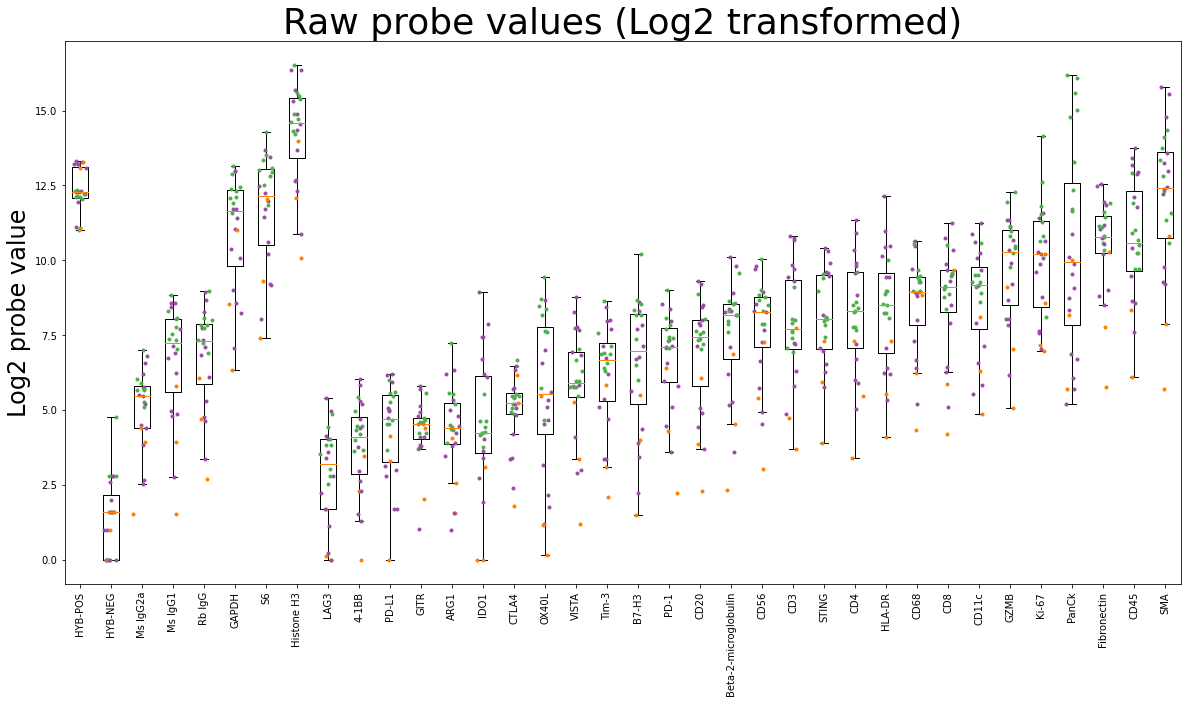

In [13]:
# Plot log2 transformed raw data before any normalisation

plt.figure(figsize=(20,10))

plt.boxplot(dataRaw.drop(labels=['mean','probeClass'], axis=1).reindex(labels=dataSortedRaw.index).T, sym='-', labels=dataSortedRaw.index)

for i,j in enumerate(dataSortedRaw.index):
    y = dataRaw.drop(labels=['mean','probeClass'], axis=1).loc[j]
    colours = [namedColourList[2] if v.split('_')[-1] == 'Tumour' else namedColourList[5] if v.split('_')[-1] == 'Immune' else namedColourList[1] for v in y.index]
#     colours = [colourList[2] if v.split('_')[-1] == 'Tumour' else colourList[5] if v.split('_')[-1] == 'Immune' else colourList[1] for v in y.index]
    y = y
    y = y.values
    x = np.random.normal(i+1, 0.1, len(y))
    
    for i in range(len(x)): 
        plt.plot(x[i], y[i], c=colours[i], marker='.')
        
plt.xticks(rotation = 90)
plt.xlabel=list(dataSortedRaw.index)

plt.title('Raw probe values (Log2 transformed)', size=36)
plt.ylabel('Log2 probe value', size=24)


In [14]:
##### QC questions / checks:

In [15]:
# colours = ['g' if x.split('_')[-1] == 'Tumour' else 'r' if x.split('_')[-1] == 'Immune' else 'purple' for x in data.drop(labels=['mean','probeClass'], axis=1).columns]


In [16]:
##### It's probably not neccessary to view the following, 
# but lets just have a quick look at how the control values 
# for the raw data is distributed to make sure there are 
# no extreme outliers before ERCC normalisation.

In [17]:
# Plot geometric means of negative controls and housekeeping genes in raw data:

In [18]:
# Calculate Ig control Geometric mean and Housekeeping gene Geometric mean
# Calculating hte mean of log transformed data is analagous to calculating the geometric mean of the non-transformed data

IgGeoMean = dataRaw.drop(labels=['mean','probeClass'], axis=1).loc[IgCTLs].mean()
HKGeoMean = dataRaw.drop(labels=['mean','probeClass'], axis=1).loc[HK].mean()

In [19]:
plt.xlabel

['HYB-POS',
 'HYB-NEG',
 'Ms IgG2a',
 'Ms IgG1',
 'Rb IgG',
 'GAPDH',
 'S6',
 'Histone H3',
 'LAG3',
 '4-1BB',
 'PD-L1',
 'GITR',
 'ARG1',
 'IDO1',
 'CTLA4',
 'OX40L',
 'VISTA',
 'Tim-3',
 'B7-H3',
 'PD-1',
 'CD20',
 'Beta-2-microglobulin',
 'CD56',
 'CD3',
 'STING',
 'CD4',
 'HLA-DR',
 'CD68',
 'CD8',
 'CD11c',
 'GZMB',
 'Ki-67',
 'PanCk',
 'Fibronectin',
 'CD45',
 'SMA']

Text(0.5, 1.0, 'Binned Counts of Raw Hosekeeping Probe Geometric Means')

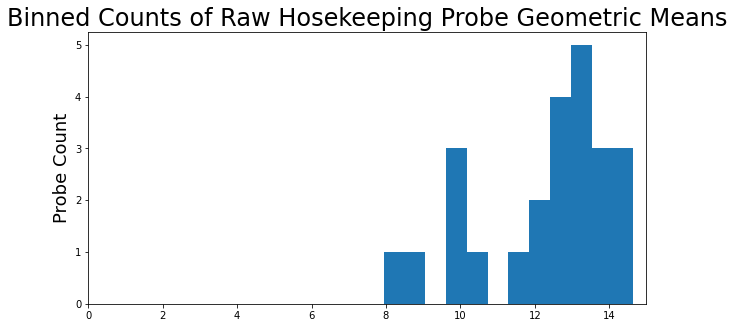

In [20]:
plt.figure(figsize=(10,5))
plt.hist(HKGeoMean, bins=12)
plt.xlim(0,15)

# plt.xlabel('Mean Probe Value', size=24)
plt.ylabel('Probe Count', size=18)
plt.title('Binned Counts of Raw Hosekeeping Probe Geometric Means', size=24)


Text(0.5, 1.0, 'Raw Hosekeeping Probe Geometric Mean Values')

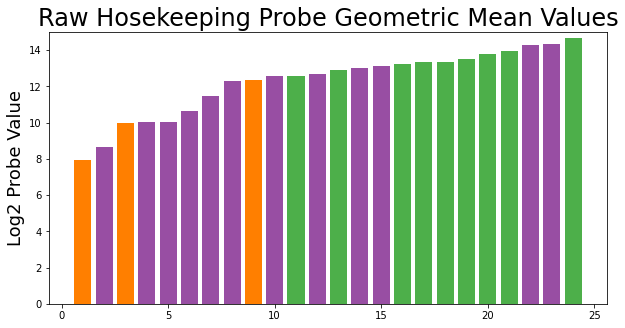

In [21]:
plt.figure(figsize=(10,5))
HKGeoMean = HKGeoMean.sort_values()
colours = ['g' if x.split('_')[-1] == 'Tumour' else 'r' if x.split('_')[-1] == 'Immune' else 'purple' for x in HKGeoMean.index]
colours = [namedColourList[2] if x.split('_')[-1] == 'Tumour' else namedColourList[5] if x.split('_')[-1] == 'Immune' else namedColourList[1] for x in HKGeoMean.index]

plt.bar(np.linspace(1,len(HKGeoMean),len(HKGeoMean)), HKGeoMean, color=colours)
plt.ylim(0,15)

plt.ylabel('Log2 Probe Value', size=18)
plt.title('Raw Hosekeeping Probe Geometric Mean Values', size=24)


Text(0.5, 1.0, 'Binned Counts of Raw Ig Control Probes Geometric Means')

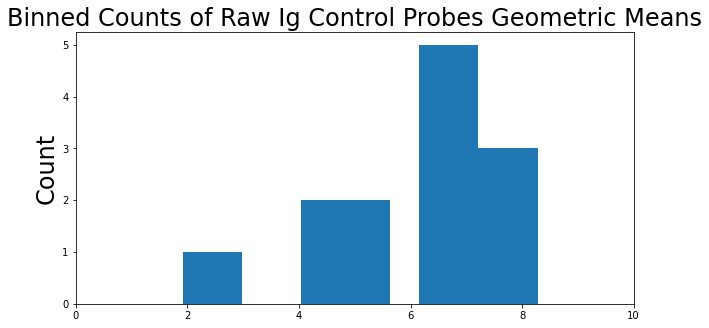

In [22]:
plt.figure(figsize=(10,5))

plt.hist(IgGeoMean, bins=12)
plt.xlim(0,10)

# plt.xlabel('Mean Probe Value', size=24)
plt.ylabel('Count', size=24)
plt.title('Binned Counts of Raw Ig Control Probes Geometric Means', size=24)


Text(0.5, 1.0, 'Raw Ig Control Probe Geometric Mean Values')

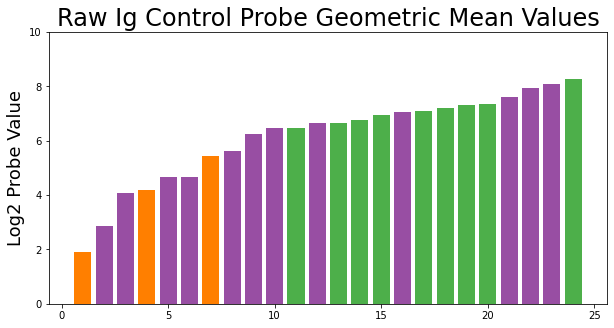

In [23]:
###
plt.figure(figsize=(10,5))
IgGeoMean = IgGeoMean.sort_values()
colours = ['g' if x.split('_')[-1] == 'Tumour' else 'r' if x.split('_')[-1] == 'Immune' else 'purple' for x in IgGeoMean.index]
colours = [namedColourList[2] if x.split('_')[-1] == 'Tumour' else namedColourList[5] if x.split('_')[-1] == 'Immune' else namedColourList[1] for x in IgGeoMean.index]

plt.bar(np.linspace(1,len(IgGeoMean),len(IgGeoMean)), IgGeoMean, color=colours)
plt.ylim(0,10)

plt.ylabel('Log2 Probe Value', size=18)
plt.title('Raw Ig Control Probe Geometric Mean Values', size=24)


In [24]:
#### Run ERCC normalisation and repeat visualisation

In [25]:
# Revert to original data and log transform again
data = dataOrig.copy()
data = np.log2(data)

# ERCC normalisation. 
# Divide by individual HYB-POS values, then scale data using the geometric mean of all HYB-POS values. subtract in log space is same as divide in normal space. Add in log space is same as multiply in normal space
data = data - data.loc['HYB-POS'] + np.mean(data.loc['HYB-POS'])
data


,BCLA_34_1.1_001_Immune,BCLA_34_1.1_002_Immune,BCLA_34_1.1_003_Immune,BCLA_34_1.1_101_Immune,BCLA_34_1.1_101_Tumour,BCLA_34_1.1_102_Immune,BCLA_34_1.1_102_Tumour,BCLA_34_1.1_103_Immune,BCLA_34_1.1_103_Tumour,BCLA_34_1.1_104_Immune,...,BCLA_34_1.1_106_Tumour,BCLA_34_1.1_201_Epi.Immune,BCLA_34_1.1_201_Tumour,BCLA_34_1.1_202_Immune,BCLA_34_1.1_203_Epi.Immune,BCLA_34_1.1_203_Tumour,BCLA_34_1.1_204_Immune,BCLA_34_1.1_205_Epi.Immune,BCLA_34_1.1_205_Tumour,BCLA_34_1.1_206_Immune
CD8,6.299433,9.014132,8.029234,10.361499,9.706505,9.599810,10.128411,10.064787,10.856500,9.979823,...,10.562111,8.915447,9.268553,8.565930,5.498287,8.661188,6.333105,4.928195,9.214842,5.463068
CD4,6.036066,9.025089,7.332204,10.458074,8.547812,9.650813,9.130555,10.187161,9.868219,10.152518,...,9.659707,6.562265,8.526984,6.768657,4.680255,7.940018,6.246478,4.516980,8.529341,4.953585
HYB-NEG,0.025314,1.939415,1.130155,1.711434,0.228110,1.647258,1.346689,0.387631,2.864664,0.247854,...,4.797334,0.842299,1.827084,1.641645,1.290209,1.868148,1.231941,0.068040,2.927986,1.039977
GZMB,8.054538,10.250463,8.788440,10.463536,10.714108,10.739341,12.152912,9.587429,11.505216,10.601340,...,12.310165,8.368415,11.211481,8.105477,6.351077,10.691010,7.385918,6.092381,11.254747,6.859290
Fibronectin,8.827897,11.596450,10.327369,11.066715,10.577328,11.908500,11.924851,10.920448,12.075902,11.778401,...,11.968270,9.515022,11.692542,10.796327,7.058181,11.429669,9.727229,6.844005,11.243808,8.030342
Beta-2-microglobulin,5.172653,8.042958,7.217551,9.233408,8.772552,8.434421,9.202189,8.674760,9.922616,9.066960,...,9.616565,6.123381,8.535587,6.254571,3.620201,7.883707,4.824968,3.599667,8.283514,4.295969
S6,9.182061,10.844543,10.747826,12.824318,13.181448,12.054605,13.202612,11.846941,14.348803,12.701208,...,14.330039,11.289747,13.750367,10.274688,8.688114,13.310537,9.264714,8.359030,13.467085,8.256713
Rb IgG,4.670140,7.394638,6.238928,8.063064,8.064804,7.785778,8.262817,7.229759,9.003184,7.905064,...,9.028386,5.325737,8.088964,5.347477,3.996040,7.616290,4.589849,3.773872,8.194034,3.796434
PD-1,4.484515,7.104884,6.096315,7.677594,7.915116,7.402851,8.655994,6.938754,9.336464,7.618999,...,9.058805,5.667973,7.644896,5.850648,3.499212,7.340185,4.819456,3.347432,7.546865,4.136505
Histone H3,12.681409,13.697174,13.797618,15.487092,14.936932,15.760735,15.663850,14.742479,15.896634,15.601576,...,16.549330,13.254672,15.627657,12.751194,11.359836,15.159502,12.121571,11.135674,15.696871,11.367208


In [26]:
# Add column to data with mean values for each probe (row).
# (If converted back from log scale, this will be the geometric mean)
mean = data.mean(axis = 1)
data = data.assign(mean=mean.values)

# Add column to data with probe class for each probe. 
# (using probeClass and probeClassDict from earlier)
data = data.assign(probeClass=[probeClassDict[v] for v in probeClass.values])

# Sort data by probeclass then geometric mean of probe values for nicer visualisation on plots
data = data.sort_values(by = ['probeClass', 'mean'], ascending=[True,True])

# Calculate negative control Geometric mean and Housekeeping gene Geometric mean
IgGeoMean = data.drop(labels=['mean','probeClass'], axis=1).loc[IgCTLs].mean()
HKGeoMean = data.drop(labels=['mean','probeClass'], axis=1).loc[HK].mean()


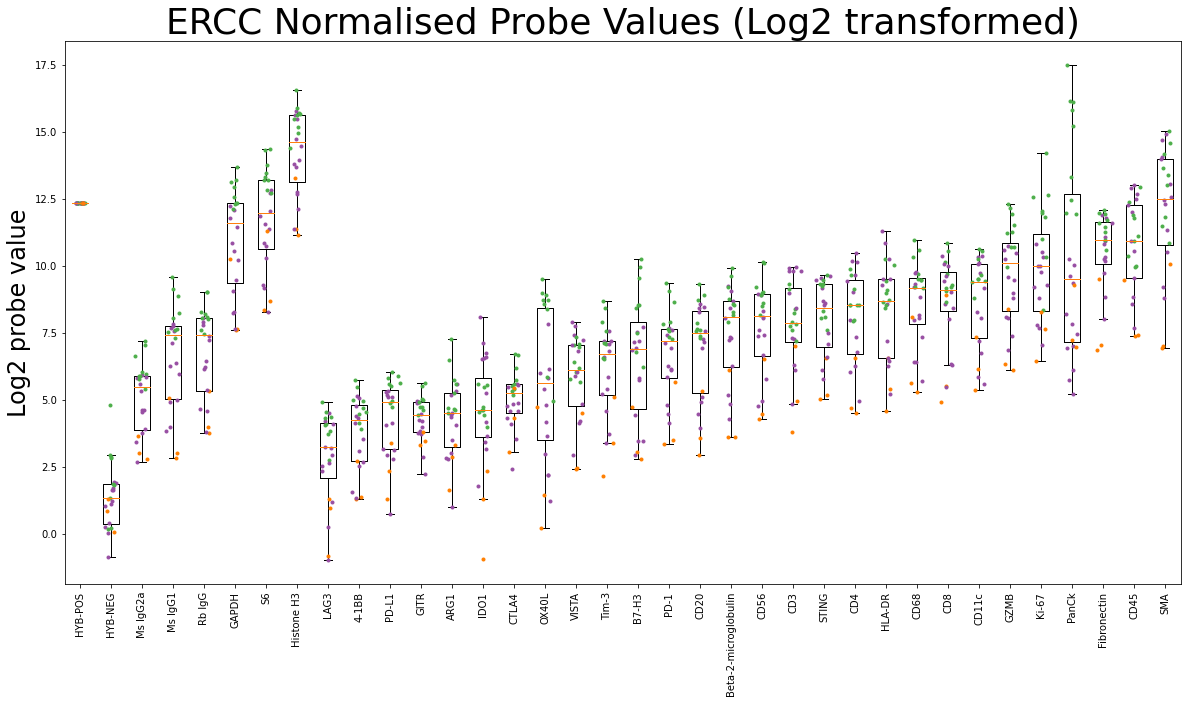

In [27]:
# plot RCC normalised data

plt.figure(figsize=(20,10))

plt.boxplot(data.drop(labels=['mean','probeClass'], axis=1).T, sym='-', labels=data.index)

for i,j in enumerate(data.index):
    y = data.loc[j].drop(index=['mean','probeClass'], axis=1)
#     colours = ['g.' if v.split('_')[-1] == 'Tumour' else 'r.' if v.split('_')[-1] == 'Immune' else 'b.' for v in y.index]
    colours = [namedColourList[2] if v.split('_')[-1] == 'Tumour' else namedColourList[5] if v.split('_')[-1] == 'Immune' else namedColourList[1] for v in y.index]
    y = y
    y = y.values
    x = np.random.normal(i+1, 0.1, len(y))
    for i in range(len(x)): 
        plt.plot(x[i], y[i], c=colours[i], marker='.')
plt.xticks(rotation = 90)
plt.xlabel=list(data.index)

plt.title('ERCC Normalised Probe Values (Log2 transformed)', size=36)
plt.ylabel('Log2 probe value', size=24)
plt.show()
plt.close()



In [28]:
# Drop 'HYB-POS' probe values. Further normalisation will scatter these values, but has no meaning
data = data.drop(labels=['HYB-POS'])


In [29]:
negScaled = data.drop(labels=['mean','probeClass'], axis=1) - IgGeoMean + IgGeoMean.mean()

mean = negScaled.mean(axis = 1)
negScaled = negScaled.assign(mean=mean.values)

negScaled = negScaled.assign(probeClass=data['probeClass'].values)

negScaled.sort_values(by = ['probeClass', 'mean'], ascending=[True,True] , inplace=True)

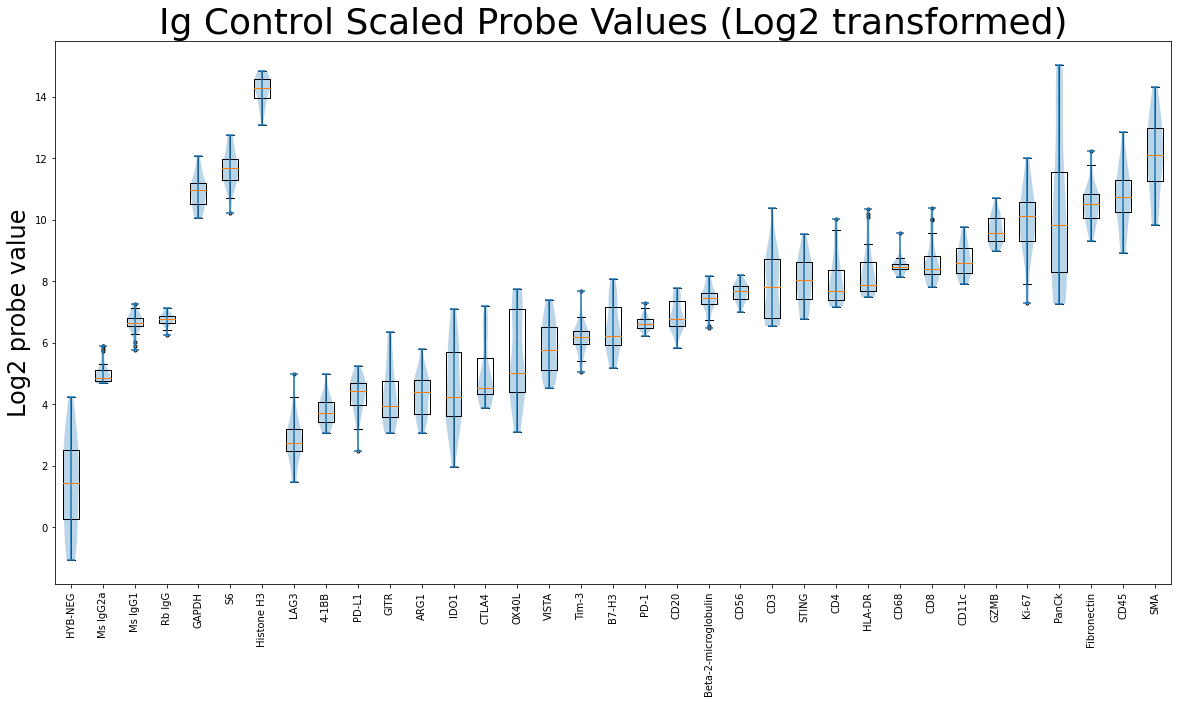

In [30]:
# Log2 Signal-to-Background Ratio
plt.figure(figsize=(20,10))

plt.boxplot(negScaled.drop(labels=['mean','probeClass'], axis=1).T, sym='.', labels=negScaled.index)
plt.violinplot(negScaled.drop(labels=['mean','probeClass'], axis=1).T)
plt.xticks(rotation = 90)
# plt.axhline(y=0.0, color='r', linestyle='-')

plt.title('Ig Control Scaled Probe Values (Log2 transformed)', size=36)
plt.ylabel('Log2 probe value', size=24)
plt.show()
plt.close()


In [31]:
#### Don't put too much stock in this plot. The data has been scaled to the Ig negative controls. BUT Nanopore say that some probes have a consistently low signal so probes with a signal below the Ig level can still be reliable 

Text(0.5, 1.0, 'Binned Counts of ERCC Norm. HK Probe Geo. Means')

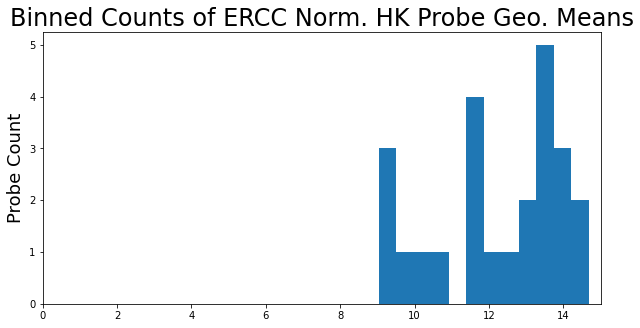

In [32]:
plt.figure(figsize=(10,5))
plt.hist(HKGeoMean, bins=12)
plt.xlim(0,15)

plt.ylabel('Probe Count', size=18)
plt.title('Binned Counts of ERCC Norm. HK Probe Geo. Means', size=24)


Text(0.5, 1.0, 'ERCC Norm. HK Probe Geo. Means')

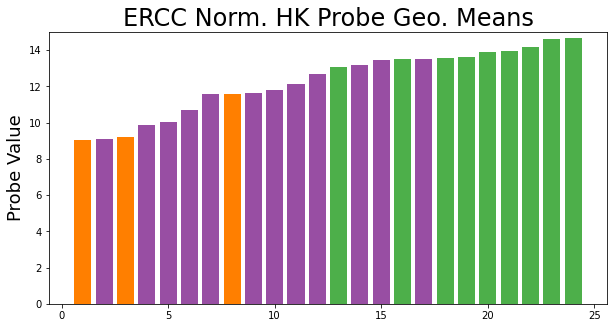

In [33]:
# HKGMeanLog2 = HKGMeanLog2.sort_values()

colours = ['g' if x.split('_')[-1] == 'Tumour' else 'r' if x.split('_')[-1] == 'Immune' else 'purple' for x in HKGeoMean.sort_values().index]
colours = [namedColourList[2] if x.split('_')[-1] == 'Tumour' else namedColourList[5] if x.split('_')[-1] == 'Immune' else namedColourList[1] for x in HKGeoMean.sort_values().index]

plt.figure(figsize=(10,5))
plt.bar(np.linspace(1,len(HKGeoMean),len(HKGeoMean)), HKGeoMean.sort_values(), color=colours)
plt.ylim(0,15)

plt.ylabel('Probe Value', size=18)
plt.title('ERCC Norm. HK Probe Geo. Means', size=24)


Text(0.5, 1.0, 'Binned Counts of ERCC Norm. Ig Ctl. Probe Geo. Means')

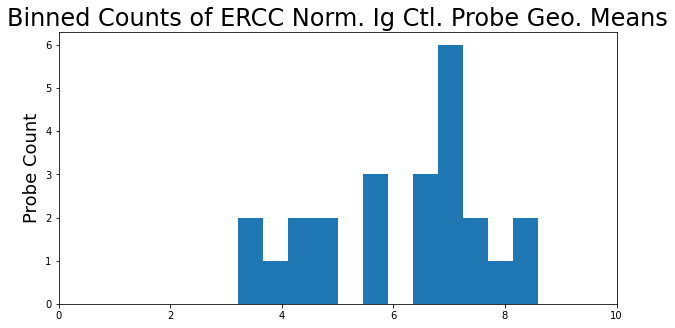

In [34]:
# Frequency vs AOIs log2 HK Geomean(Counts)
# AOIs log2 HK Geomean(Counts) vs Individual AOIs

# Frequency vs AOIs log2 IgG Geomean(Counts)
# AOIs log2 IgG Geomean(Counts) vs Individual AOIs

plt.figure(figsize=(10,5))

plt.hist(IgGeoMean, bins=12)
plt.xlim(0,10)

plt.ylabel('Probe Count', size=18)
plt.title('Binned Counts of ERCC Norm. Ig Ctl. Probe Geo. Means', size=24)


Text(0.5, 1.0, 'ERCC Norm. Ig Ctl. Probe Geo. Means')

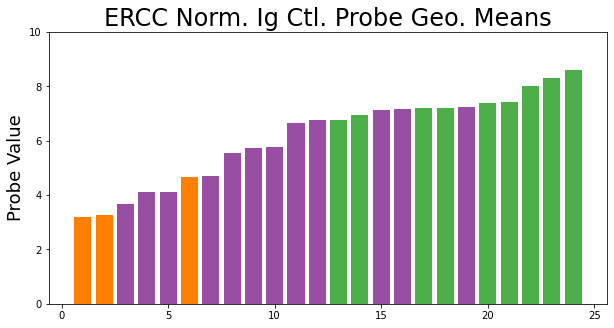

In [35]:
###
plt.figure(figsize=(10,5))
# IgGeoMean = IgGeoMean.sort_values()
colours = ['g' if x.split('_')[-1] == 'Tumour' else 'r' if x.split('_')[-1] == 'Immune' else 'purple' for x in IgGeoMean.sort_values().index]
colours = [namedColourList[2] if x.split('_')[-1] == 'Tumour' else namedColourList[5] if x.split('_')[-1] == 'Immune' else namedColourList[1] for x in IgGeoMean.sort_values().index]

plt.bar(np.linspace(1,len(IgGeoMean),len(IgGeoMean)), IgGeoMean.sort_values(), color=colours)
plt.ylim(0,10)

plt.ylabel('Probe Value', size=18)
plt.title('ERCC Norm. Ig Ctl. Probe Geo. Means', size=24)

In [36]:
## Plot control scatter plots and choose factors for further normalisation

In [37]:
# colours = ['g' if x.split('_')[-1] == 'Tumour' else 'r' for x in data.drop(labels=['mean','probeClass'], axis=1).columns]
colours = ['g' if x.split('_')[-1] == 'Tumour' else 'r' if x.split('_')[-1] == 'Immune' else 'purple' for x in data.drop(labels=['mean','probeClass'], axis=1).columns]
colours = [namedColourList[2] if x.split('_')[-1] == 'Tumour' else namedColourList[5] if x.split('_')[-1] == 'Immune' else namedColourList[1] for x in data.drop(labels=['mean','probeClass'], axis=1).columns]



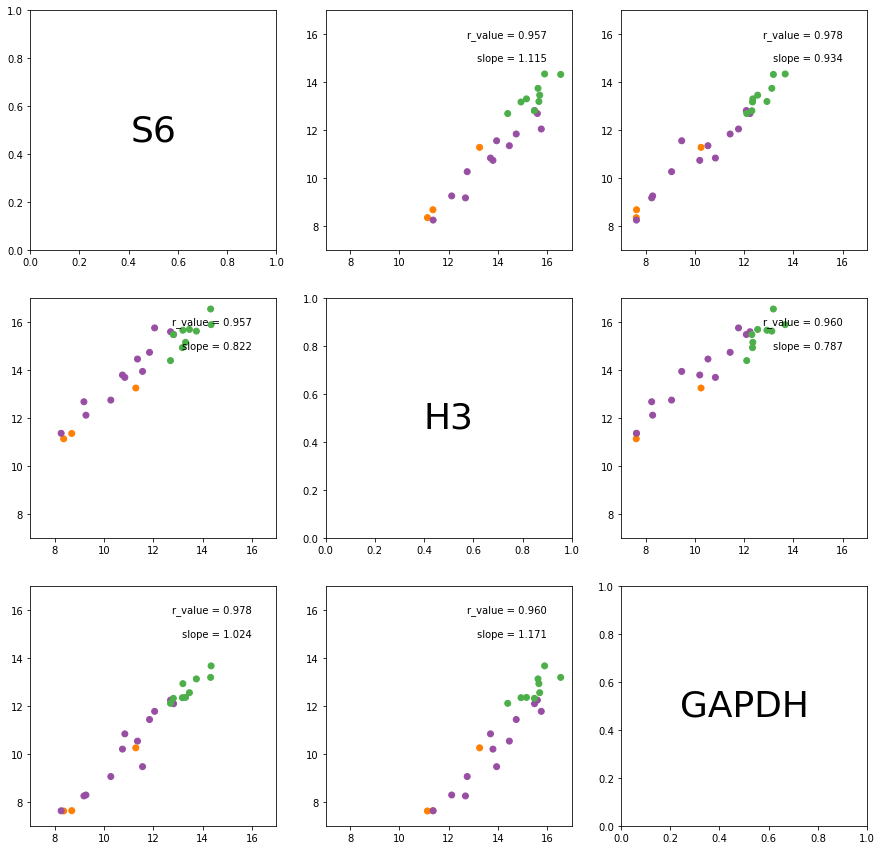

In [38]:
###
# Matrix of HK expression plots
rows = 3
cols = 3

fig, axes = plt.subplots(rows,cols, figsize=(15,15))


S6 = [(x) for x in data.drop(labels=['mean','probeClass'], axis=1).loc['S6'].values]
H3 = [(x) for x in data.drop(labels=['mean','probeClass'], axis=1).loc['Histone H3'].values]
GAPDH = [(x) for x in data.drop(labels=['mean','probeClass'], axis=1).loc['GAPDH'].values]

labels = ['S6', 'H3', 'GAPDH']
dataList = [S6, H3, GAPDH]

axMin = int(min([min(x) for x in dataList]))
axMax = int(max([max(x) for x in dataList]))+1


for r in range(rows):
    for c in range(cols):
        if r==c: # This is a diagonal, insert a label
            axes[r][c].text(0.5,0.5, labels[r],ha='center', va='center', transform=axes[r][c].transAxes,fontsize=36)
        else:
            axes[r][c].scatter(dataList[c], dataList[r], c=colours)
            slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(dataList[c], dataList[r])
            axes[r][c].text(0.9,0.9, "r_value = " + str(r_value)[:5],ha='right', va='center', transform=axes[r][c].transAxes)
            axes[r][c].text(0.9,0.8, "slope = " + str(slope)[:5],ha='right', va='center', transform=axes[r][c].transAxes)
            axes[r][c].set_xlim(axMin,axMax)
            axes[r][c].set_ylim(axMin,axMax)



In [39]:
# Suggest dropping H3 from HK controls

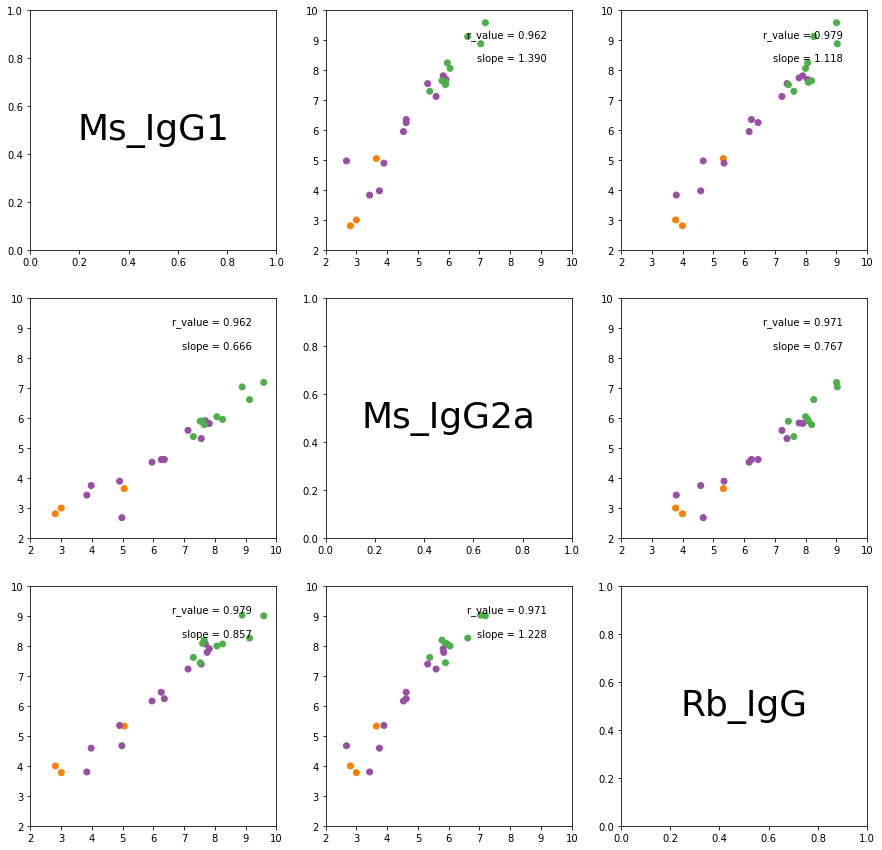

In [40]:

# Matrix of IgG expression plots
rows = 3
cols = 3

fig, axes = plt.subplots(rows,cols, figsize=(15,15))


mIG1 = [(x) for x in data.drop(labels=['mean','probeClass'], axis=1).loc['Ms IgG1'].values]
mIG2 = [(x) for x in data.drop(labels=['mean','probeClass'], axis=1).loc['Ms IgG2a'].values]
rIG = [(x) for x in data.drop(labels=['mean','probeClass'], axis=1).loc['Rb IgG'].values]

labels = ['Ms_IgG1', 'Ms_IgG2a', 'Rb_IgG']
dataList = [mIG1,mIG2,rIG]

axMin = int(min([min(x) for x in dataList]))
axMax = int(max([max(x) for x in dataList]))+1


for r in range(rows):
    for c in range(cols):
        if r==c: # This is a diagonal, insert a label
            axes[r][c].text(0.5,0.5, labels[r],ha='center', va='center', transform=axes[r][c].transAxes,fontsize=36)
        else:
            axes[r][c].scatter(dataList[c], dataList[r], c=colours)
            slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(dataList[c], dataList[r])
            axes[r][c].text(0.9,0.9, "r_value = " + str(r_value)[:5],ha='right', va='center', transform=axes[r][c].transAxes)
            axes[r][c].text(0.9,0.8, "slope = " + str(slope)[:5],ha='right', va='center', transform=axes[r][c].transAxes)
            axes[r][c].set_xlim(axMin,axMax)
            axes[r][c].set_ylim(axMin,axMax)
                

In [41]:
#Suggest dropping Ms_IgG2a

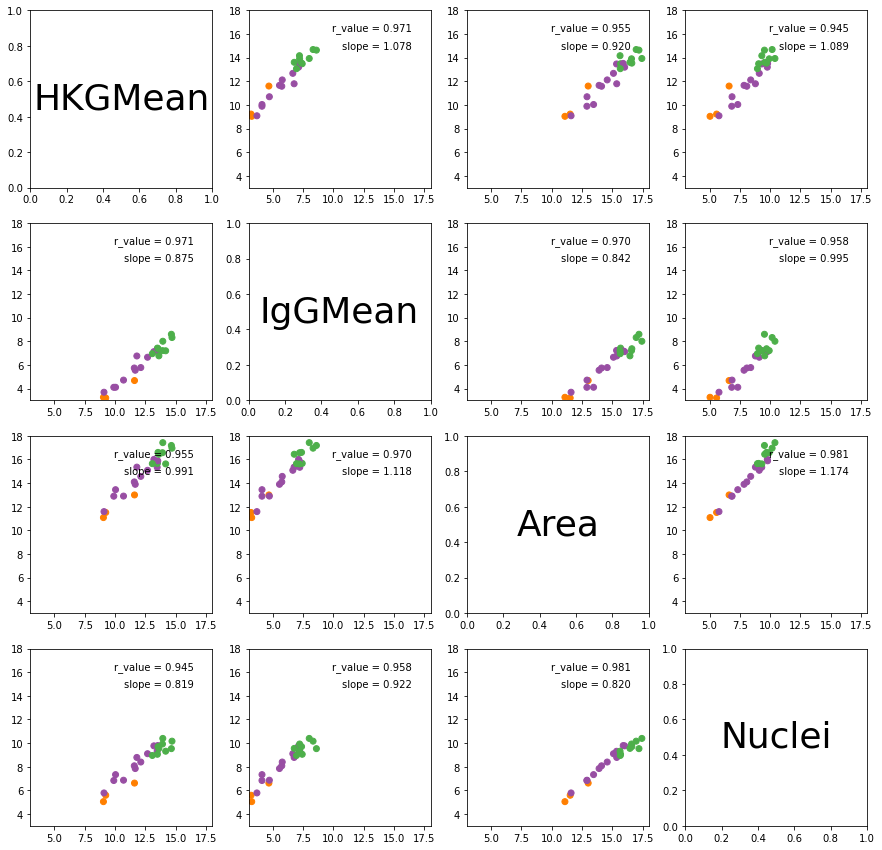

In [42]:
# Matrix of IgG expression plots
rows = 4
cols = 4

fig, axes = plt.subplots(rows,cols, figsize=(15,15))

labels = ['HKGMean', 'IgGMean', 'Area', 'Nuclei']
dataList = [HKGeoMean, IgGeoMean, np.log2(list(surfArea.values)), np.log2(list(nuclei.values))]

axMin = int(min([min(x) for x in dataList]))
axMax = int(max([max(x) for x in dataList]))+1


for r in range(rows):
    for c in range(cols):
        if r==c: # This is a diagonal, insert a label
            axes[r][c].text(0.5,0.5, labels[r],ha='center', va='center', transform=axes[r][c].transAxes,fontsize=36)
        else:
            axes[r][c].scatter(dataList[c], dataList[r], c=colours)
            slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(dataList[c], dataList[r])
            axes[r][c].text(0.9,0.9, "r_value = " + str(r_value)[:5],ha='right', va='center', transform=axes[r][c].transAxes)
            axes[r][c].text(0.9,0.8, "slope = " + str(slope)[:5],ha='right', va='center', transform=axes[r][c].transAxes)
            axes[r][c].set_xlim(axMin,axMax)
            axes[r][c].set_ylim(axMin,axMax)
                
            
        
    

In [55]:
#drop least consistent controls and repeat plots
IgCTLs.remove('Ms IgG2a')
HK.remove('Histone H3')



ValueError: list.remove(x): x not in list

In [56]:
# Calculate negative control Geometric mean and Housekeeping gene Geometric mean
IgGeoMean = data.drop(labels=['mean','probeClass'], axis=1).loc[IgCTLs].mean()
HKGeoMean = data.drop(labels=['mean','probeClass'], axis=1).loc[HK].mean()

Text(0, 0.5, 'Log2 probe value')

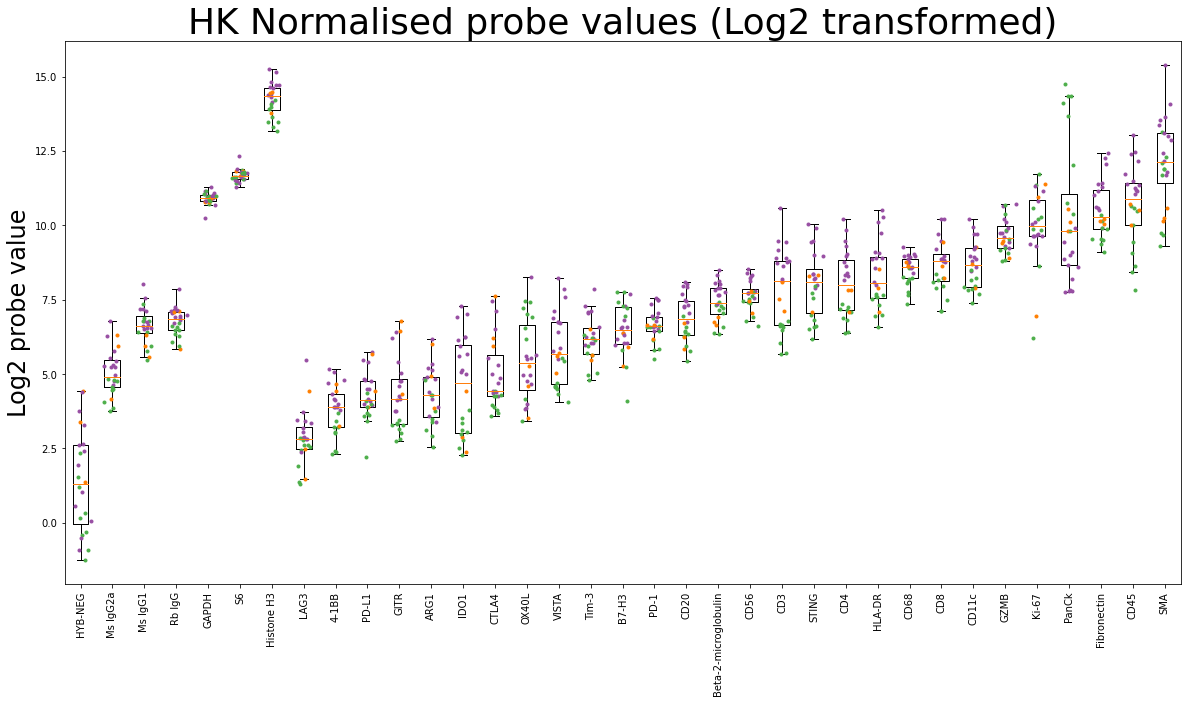

In [59]:
# Plot HK normalised data
plt.figure(figsize=(20,10))

HKNormData = (data.drop(labels=['mean','probeClass'], axis=1).reindex(labels=negScaled.index) - HKGeoMean) + np.mean(HKGeoMean)

plt.boxplot(HKNormData.T, sym='-', labels=negScaled.index)

for i,j in enumerate(negScaled.index):
    y = HKNormData.loc[j]
#     colours = ['g.' if v.split('_')[-1] == 'Tumour' else 'r.' if v.split('_')[-1] == 'Immune' else 'b.' for v in y.index]
    colours = [namedColourList[2] if v.split('_')[-1] == 'Tumour' else namedColourList[5] if v.split('_')[-1] == 'Immune' else namedColourList[1] for v in y.index]
    
    y = y
    y = y.values
    x = np.random.normal(i+1, 0.1, len(y))
    
    for i in range(len(x)): 
        plt.plot(x[i], y[i], c=colours[i], marker='.')
plt.xticks(rotation = 90)
    
plt.title('HK Normalised probe values (Log2 transformed)', size=36)
plt.ylabel('Log2 probe value', size=24)


Text(0, 0.5, 'Log2 probe value')

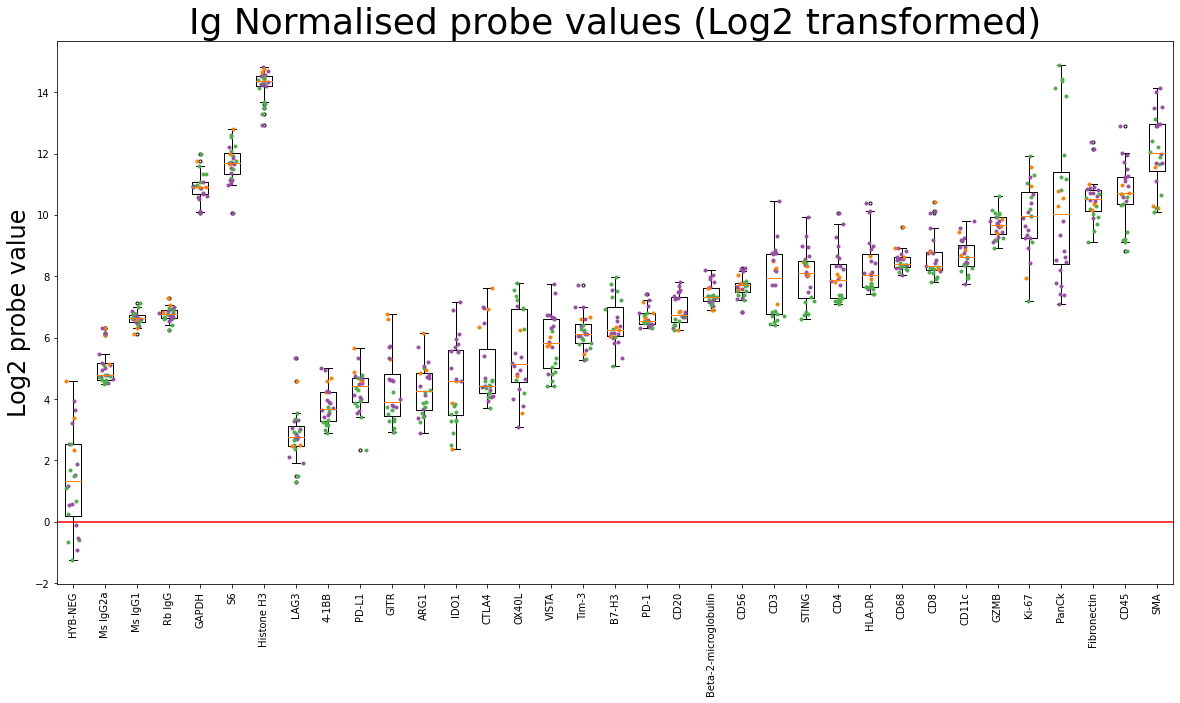

In [60]:
# Plot negative probe normalised data
plt.figure(figsize=(20,10))

IgNormData = (data.drop(labels=['mean','probeClass'], axis=1).reindex(labels=negScaled.index) - IgGeoMean) + np.mean(IgGeoMean)


plt.boxplot(IgNormData.T, sym='.', labels=negScaled.index)

for i,j in enumerate(negScaled.index):
    y = IgNormData.loc[j]
    colours = [namedColourList[2] if v.split('_')[-1] == 'Tumour' else namedColourList[5] if v.split('_')[-1] == 'Immune' else namedColourList[1] for v in y.index]
    y = y
    y = y.values
    x = np.random.normal(i+1, 0.1, len(y))
    
    for i in range(len(x)): 
        plt.plot(x[i], y[i], c=colours[i], marker='.')
plt.xticks(rotation = 90)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.xlabel=list(negScaled.index)
    
plt.title('Ig Normalised probe values (Log2 transformed)', size=36)
plt.ylabel('Log2 probe value', size=24)


In [48]:
# Revert to original data nad log transform again
dataFinal = dataOrig.copy()
dataFinal = np.log2(dataFinal)


#ERCC normalisation

dataFinal = dataFinal - dataFinal.loc['HYB-POS'] + np.mean(dataFinal.loc['HYB-POS'])
dataFinal

,BCLA_34_1.1_001_Immune,BCLA_34_1.1_002_Immune,BCLA_34_1.1_003_Immune,BCLA_34_1.1_101_Immune,BCLA_34_1.1_101_Tumour,BCLA_34_1.1_102_Immune,BCLA_34_1.1_102_Tumour,BCLA_34_1.1_103_Immune,BCLA_34_1.1_103_Tumour,BCLA_34_1.1_104_Immune,...,BCLA_34_1.1_106_Tumour,BCLA_34_1.1_201_Epi.Immune,BCLA_34_1.1_201_Tumour,BCLA_34_1.1_202_Immune,BCLA_34_1.1_203_Epi.Immune,BCLA_34_1.1_203_Tumour,BCLA_34_1.1_204_Immune,BCLA_34_1.1_205_Epi.Immune,BCLA_34_1.1_205_Tumour,BCLA_34_1.1_206_Immune
CD8,6.299433,9.014132,8.029234,10.361499,9.706505,9.599810,10.128411,10.064787,10.856500,9.979823,...,10.562111,8.915447,9.268553,8.565930,5.498287,8.661188,6.333105,4.928195,9.214842,5.463068
CD4,6.036066,9.025089,7.332204,10.458074,8.547812,9.650813,9.130555,10.187161,9.868219,10.152518,...,9.659707,6.562265,8.526984,6.768657,4.680255,7.940018,6.246478,4.516980,8.529341,4.953585
HYB-NEG,0.025314,1.939415,1.130155,1.711434,0.228110,1.647258,1.346689,0.387631,2.864664,0.247854,...,4.797334,0.842299,1.827084,1.641645,1.290209,1.868148,1.231941,0.068040,2.927986,1.039977
GZMB,8.054538,10.250463,8.788440,10.463536,10.714108,10.739341,12.152912,9.587429,11.505216,10.601340,...,12.310165,8.368415,11.211481,8.105477,6.351077,10.691010,7.385918,6.092381,11.254747,6.859290
Fibronectin,8.827897,11.596450,10.327369,11.066715,10.577328,11.908500,11.924851,10.920448,12.075902,11.778401,...,11.968270,9.515022,11.692542,10.796327,7.058181,11.429669,9.727229,6.844005,11.243808,8.030342
Beta-2-microglobulin,5.172653,8.042958,7.217551,9.233408,8.772552,8.434421,9.202189,8.674760,9.922616,9.066960,...,9.616565,6.123381,8.535587,6.254571,3.620201,7.883707,4.824968,3.599667,8.283514,4.295969
S6,9.182061,10.844543,10.747826,12.824318,13.181448,12.054605,13.202612,11.846941,14.348803,12.701208,...,14.330039,11.289747,13.750367,10.274688,8.688114,13.310537,9.264714,8.359030,13.467085,8.256713
Rb IgG,4.670140,7.394638,6.238928,8.063064,8.064804,7.785778,8.262817,7.229759,9.003184,7.905064,...,9.028386,5.325737,8.088964,5.347477,3.996040,7.616290,4.589849,3.773872,8.194034,3.796434
PD-1,4.484515,7.104884,6.096315,7.677594,7.915116,7.402851,8.655994,6.938754,9.336464,7.618999,...,9.058805,5.667973,7.644896,5.850648,3.499212,7.340185,4.819456,3.347432,7.546865,4.136505
Histone H3,12.681409,13.697174,13.797618,15.487092,14.936932,15.760735,15.663850,14.742479,15.896634,15.601576,...,16.549330,13.254672,15.627657,12.751194,11.359836,15.159502,12.121571,11.135674,15.696871,11.367208


In [49]:
# Calculate negative control Geometric mean and Housekeeping gene Geometric mean
IgGeoMean = dataFinal.loc[IgCTLs].mean()
HKGeoMean = dataFinal.loc[HK].mean()

In [50]:
# Drop control probe values from negScaled to generate index for exporting. HYB-POS has already been dropped.

# data = data.drop(labels=['HYB-POS', 'HYB-NEG', 'Rb IgG', 'Ms IgG2a', 'Ms IgG1'])
exportIndex = negScaled.drop(labels=['HYB-NEG', 'Rb IgG', 'Ms IgG2a', 'Ms IgG1']).index

In [51]:
# Export data scaled to HK Geo. mean and Ig Geo mean with outlier control probes dropped

dataHKGMScaled = (dataFinal.reindex(labels=exportIndex) - HKGeoMean) + np.mean(HKGeoMean)
dataHKGMScaled.to_csv('HK_Geo_Mean_Scaled.csv')

dataIgGMScaled = (dataFinal.reindex(labels=exportIndex) - IgGeoMean) + np.mean(IgGeoMean)
dataIgGMScaled.to_csv('Ig_Geo_Mean_Scaled.csv')

sampleInfo.to_csv('Sample_Info.csv')

In [52]:
dataHKGMScaled

,BCLA_34_1.1_001_Immune,BCLA_34_1.1_002_Immune,BCLA_34_1.1_003_Immune,BCLA_34_1.1_101_Immune,BCLA_34_1.1_101_Tumour,BCLA_34_1.1_102_Immune,BCLA_34_1.1_102_Tumour,BCLA_34_1.1_103_Immune,BCLA_34_1.1_103_Tumour,BCLA_34_1.1_104_Immune,...,BCLA_34_1.1_106_Tumour,BCLA_34_1.1_201_Epi.Immune,BCLA_34_1.1_201_Tumour,BCLA_34_1.1_202_Immune,BCLA_34_1.1_203_Epi.Immune,BCLA_34_1.1_203_Tumour,BCLA_34_1.1_204_Immune,BCLA_34_1.1_205_Epi.Immune,BCLA_34_1.1_205_Tumour,BCLA_34_1.1_206_Immune
GAPDH,10.827717,11.290412,11.021253,10.928910,10.876224,11.155060,11.158369,11.088649,10.955833,11.065377,...,10.725386,10.776423,10.983561,10.685703,10.767579,10.817999,10.805973,10.925482,10.837498,10.980475
S6,11.764417,11.301722,11.570880,11.663221,11.715909,11.437073,11.433764,11.503483,11.636299,11.526754,...,11.866747,11.815708,11.608572,11.906429,11.824553,11.774134,11.786160,11.666651,11.754635,11.611657
Histone H3,15.263764,14.154352,14.620672,14.325995,13.471393,15.143203,13.895001,14.399021,13.184131,14.427122,...,14.086038,13.780633,13.485862,14.382936,14.496274,13.623098,14.643017,14.443295,13.984421,14.722153
LAG3,2.824359,3.712818,3.169898,3.351989,1.301188,3.468808,2.601885,2.845825,1.368850,3.044977,...,2.453945,1.488163,1.920670,2.808328,4.426647,2.773576,5.458254,2.495565,2.850014,2.394921
4-1BB,4.138072,4.782605,3.898648,3.998277,3.231573,4.145090,3.223720,3.796968,3.036200,3.901483,...,3.013004,3.257789,2.311783,4.314919,4.426647,2.373277,5.057955,4.680229,2.413188,4.699489
PD-L1,5.392189,5.742991,3.960120,4.164931,3.421559,4.502301,4.099325,4.767292,2.226186,4.000877,...,3.580697,3.902197,3.678657,4.807324,4.426647,3.994964,5.457250,5.664486,3.884633,4.098783
GITR,6.408239,4.167416,5.033887,3.765944,3.279348,4.245333,3.271495,4.124851,2.808340,3.767055,...,3.150713,4.323830,2.761152,5.405834,6.443618,3.464191,4.770358,6.784949,3.010115,6.219247
ARG1,3.601545,4.905042,5.195012,4.149076,4.280009,3.898071,3.478607,4.845404,3.770527,4.407126,...,4.811363,3.855042,2.544039,5.132137,5.995892,3.123381,5.322632,4.944906,2.916025,6.186558
IDO1,6.237011,7.017321,4.997587,6.907598,2.507389,6.132998,3.792144,6.258476,2.781501,5.931560,...,3.120020,2.879377,2.274408,5.074012,4.426647,2.994865,5.679543,2.375662,3.034777,5.128431
CTLA4,5.002456,5.305953,4.347995,4.433410,3.701678,4.869297,4.432059,4.246315,3.961984,4.391019,...,4.247463,5.953152,3.578303,6.524856,6.204185,3.797338,7.115888,7.612631,3.886159,7.445478


In [53]:
dataIgGMScaled

,BCLA_34_1.1_001_Immune,BCLA_34_1.1_002_Immune,BCLA_34_1.1_003_Immune,BCLA_34_1.1_101_Immune,BCLA_34_1.1_101_Tumour,BCLA_34_1.1_102_Immune,BCLA_34_1.1_102_Tumour,BCLA_34_1.1_103_Immune,BCLA_34_1.1_103_Tumour,BCLA_34_1.1_104_Immune,...,BCLA_34_1.1_106_Tumour,BCLA_34_1.1_201_Epi.Immune,BCLA_34_1.1_201_Tumour,BCLA_34_1.1_202_Immune,BCLA_34_1.1_203_Epi.Immune,BCLA_34_1.1_203_Tumour,BCLA_34_1.1_204_Immune,BCLA_34_1.1_205_Epi.Immune,BCLA_34_1.1_205_Tumour,BCLA_34_1.1_206_Immune
GAPDH,10.119148,10.055365,10.597860,10.910825,10.882734,10.703918,10.930397,10.951291,11.071337,11.077057,...,10.929428,11.758042,11.978994,10.626544,10.923642,11.594364,10.698061,10.925011,11.324493,10.506442
S6,11.055848,10.066675,11.147488,11.645136,11.722420,10.985930,11.205791,11.366125,11.751802,11.538434,...,12.070789,12.797327,12.604006,11.847270,11.980616,12.550499,11.678248,11.666181,12.241631,11.137624
Histone H3,14.555196,12.919306,14.197280,14.307910,13.477903,14.692060,13.667029,14.261663,13.299634,14.438802,...,14.290080,14.762252,14.481295,14.323776,14.652337,14.399464,14.535105,14.442824,14.471416,14.248119
LAG3,2.115790,2.477771,2.746506,3.333904,1.307699,3.017666,2.373913,2.708467,1.484353,3.056657,...,2.657988,2.469782,2.916103,2.749168,4.582710,3.549941,5.350342,2.495094,3.337009,1.920888
4-1BB,3.429503,3.547558,3.475256,3.980192,3.238083,3.693948,2.995748,3.659610,3.151702,3.913163,...,3.217047,4.239408,3.307217,4.255760,4.582710,3.149642,4.950043,4.679758,2.900184,4.225455
PD-L1,4.683620,4.507944,3.536728,4.146846,3.428070,4.051158,3.871353,4.629934,2.341689,4.012557,...,3.784739,4.883816,4.674090,4.748165,4.582710,4.771329,5.349338,5.664016,4.371629,3.624750
GITR,5.699671,2.932369,4.610495,3.747859,3.285859,3.794190,3.043523,3.987493,2.923843,3.778734,...,3.354756,5.305449,3.756586,5.346675,6.599681,4.240557,4.662446,6.784478,3.497110,5.745214
ARG1,2.892977,3.669995,4.771620,4.130990,4.286520,3.446929,3.250635,4.708046,3.886030,4.418806,...,5.015406,4.836660,3.539472,5.072978,6.151955,3.899746,5.214720,4.944435,3.403021,5.712524
IDO1,5.528442,5.782274,4.574195,6.889513,2.513900,5.681855,3.564172,6.121119,2.897004,5.943240,...,3.324062,3.860996,3.269842,5.014853,4.582710,3.771230,5.571630,2.375191,3.521773,4.654398
CTLA4,4.293887,4.070906,3.924603,4.415325,3.708189,4.418154,4.204087,4.108957,4.077487,4.402699,...,4.451506,6.934771,4.573737,6.465697,6.360249,4.573703,7.007976,7.612161,4.373155,6.971445


In [54]:
# To Do:

### Generate new dataFrame with mask of where individual values are below HYB-NEG


### Generate new dataFrame with mask of where individual values are below NegGeoMean 
### Generate new dataFrame with mask of where mean value of a probe is below NegGeoMean 